This notebook is for visualizing the new TF-Modisco results for ZF6 from CTCF.

In [2]:
# Import necessary dependencies

%matplotlib inline
from __future__ import division;
from __future__ import print_function;
import numpy as np
import modisco
import sys
print (sys.version)
import os

TF-MoDISco is using the TensorFlow backend.


2.7.15 |Anaconda custom (64-bit)| (default, Oct 10 2018, 21:32:13) 
[GCC 7.3.0]


Save and print the results.

Metaclusters heatmap


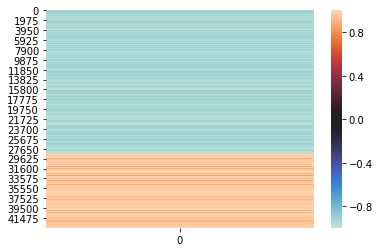

metacluster_0
activity pattern: [-1]
metacluster_0 pattern_0
total seqlets: 1147
Task 0 hypothetical scores:


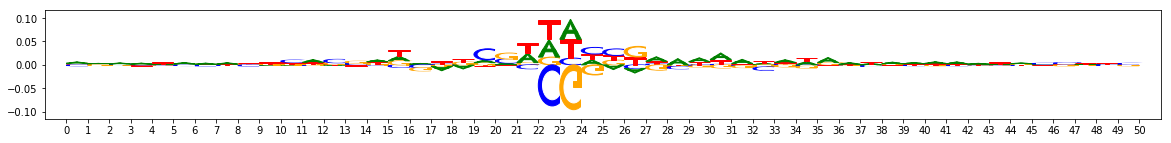

Task 0 actual importance scores:


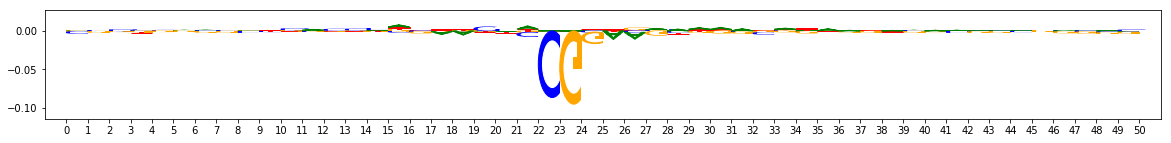

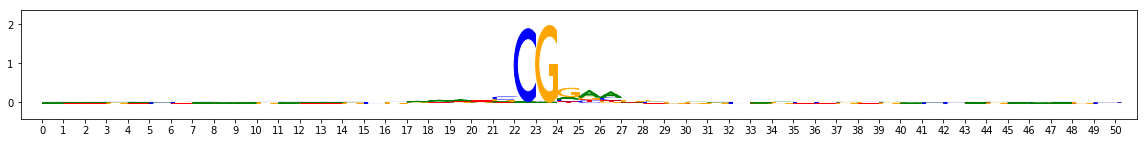

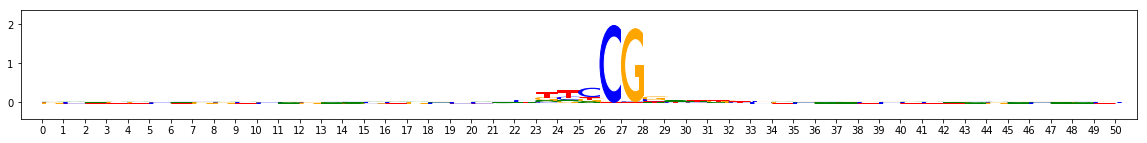

metacluster_0 pattern_1
total seqlets: 648
Task 0 hypothetical scores:


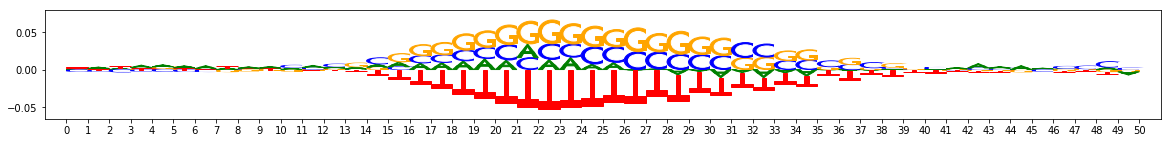

Task 0 actual importance scores:


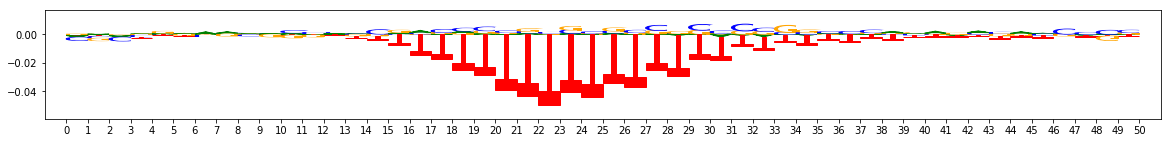

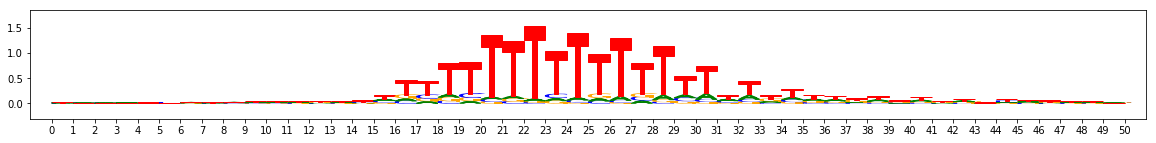

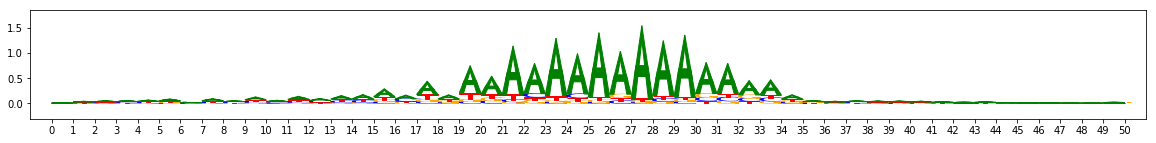

metacluster_0 pattern_2
total seqlets: 501
Task 0 hypothetical scores:


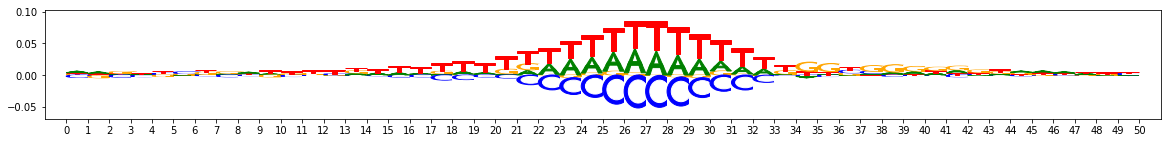

Task 0 actual importance scores:


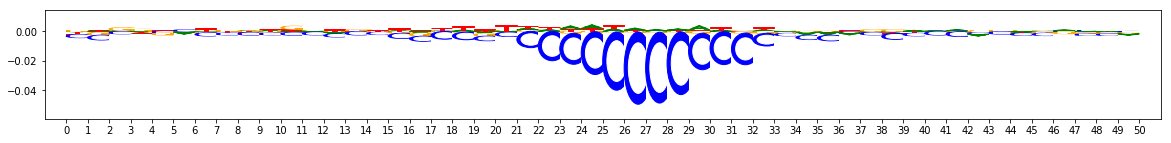

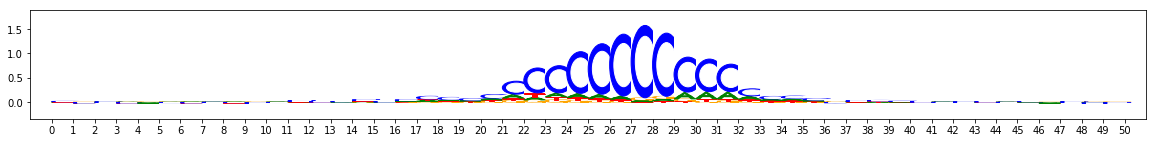

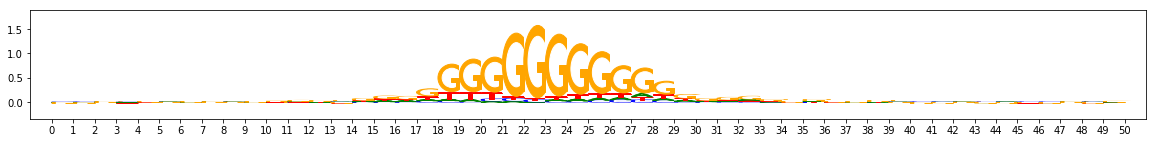

metacluster_0 pattern_3
total seqlets: 159
Task 0 hypothetical scores:


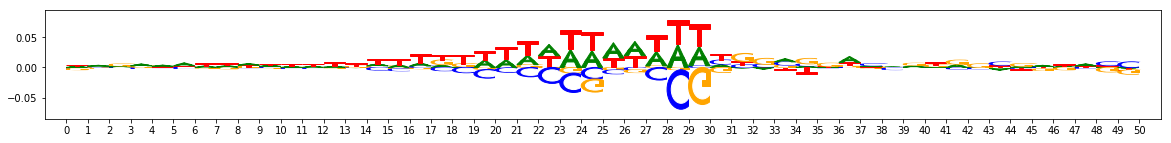

Task 0 actual importance scores:


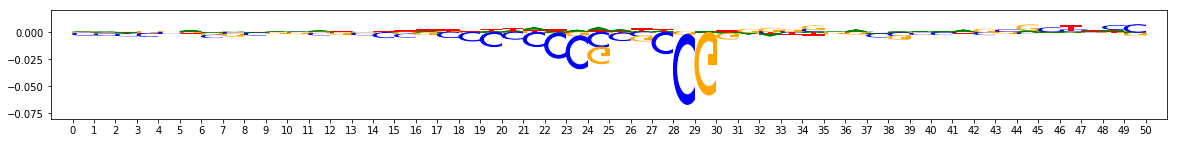

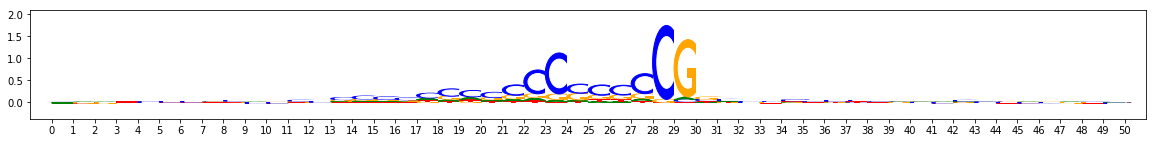

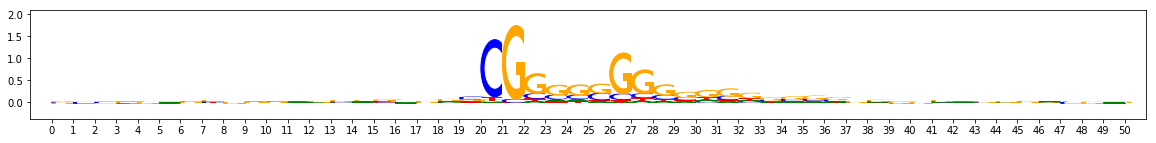

metacluster_0 pattern_4
total seqlets: 151
Task 0 hypothetical scores:


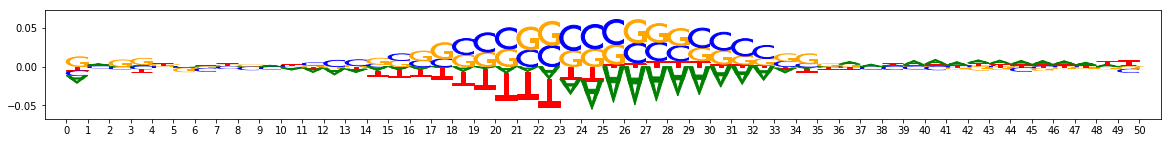

Task 0 actual importance scores:


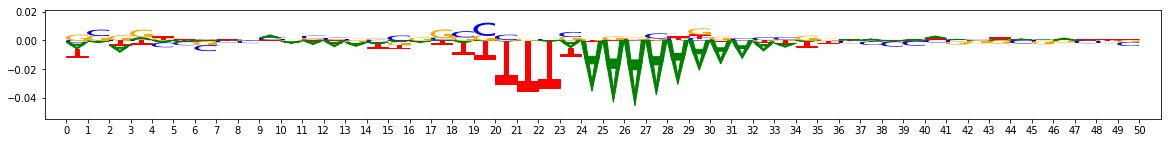

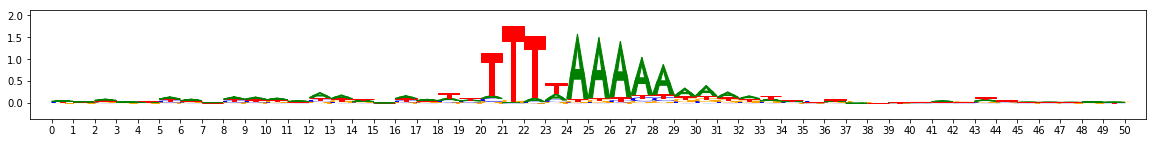

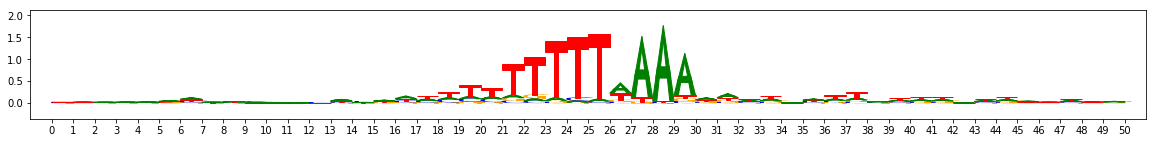

metacluster_0 pattern_5
total seqlets: 101
Task 0 hypothetical scores:


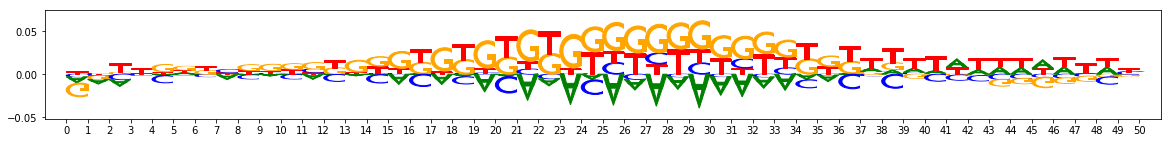

Task 0 actual importance scores:


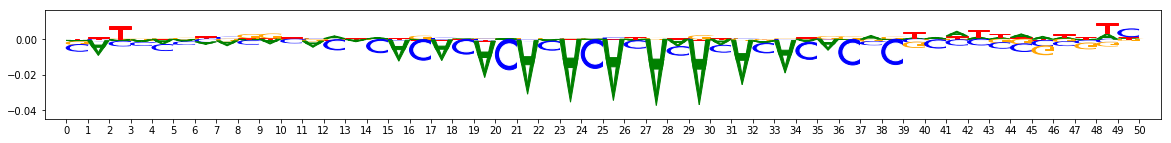

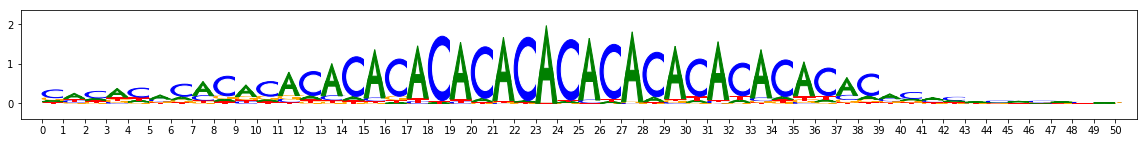

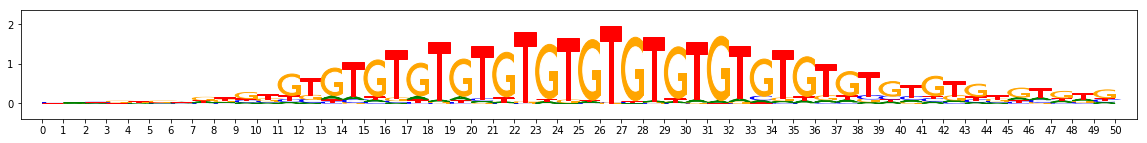

metacluster_0 pattern_6
total seqlets: 41
Task 0 hypothetical scores:


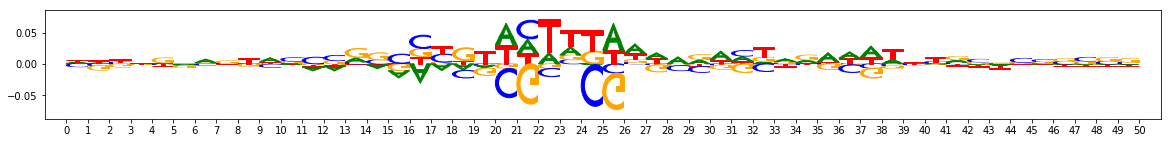

Task 0 actual importance scores:


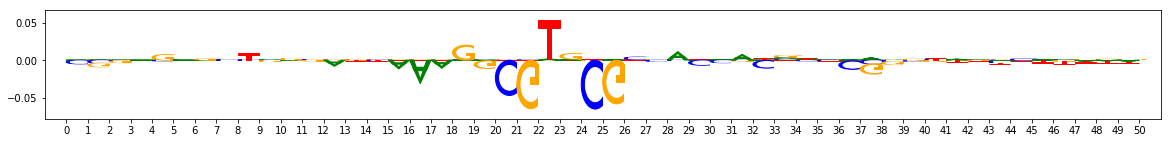

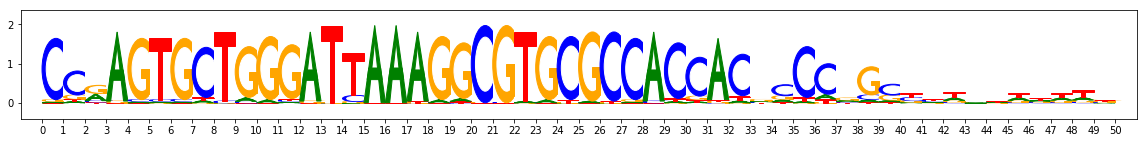

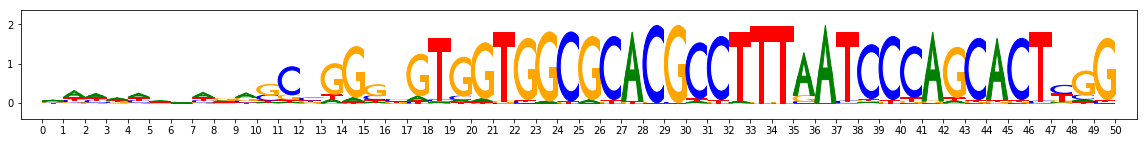

metacluster_1
activity pattern: [1]
metacluster_1 pattern_0
total seqlets: 5618
Task 0 hypothetical scores:


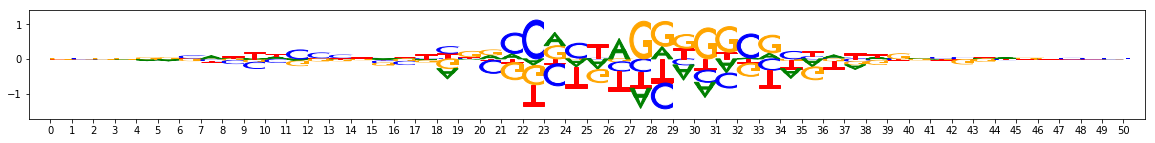

Task 0 actual importance scores:


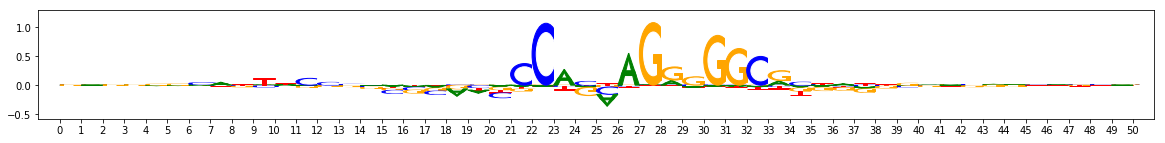

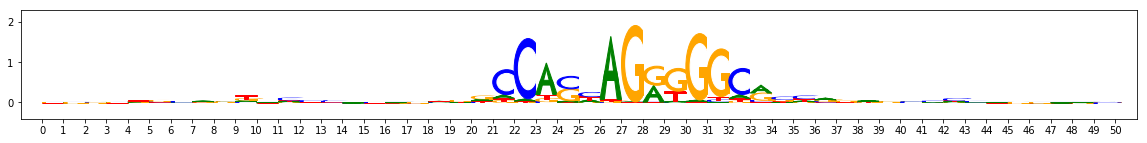

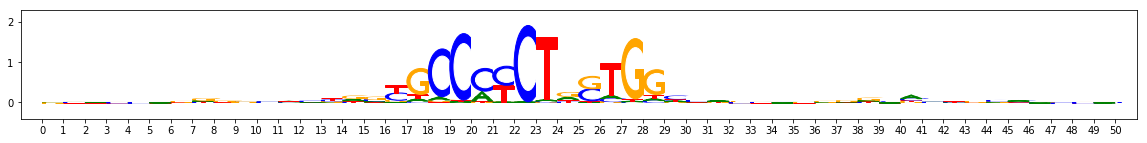

metacluster_1 pattern_1
total seqlets: 441
Task 0 hypothetical scores:


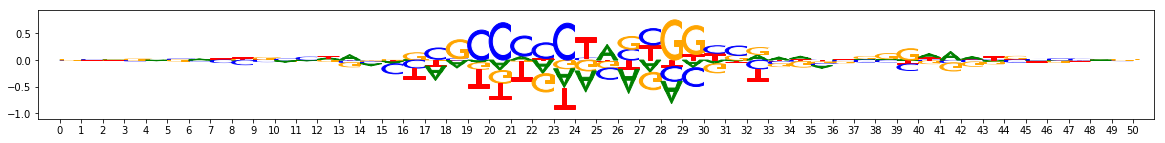

Task 0 actual importance scores:


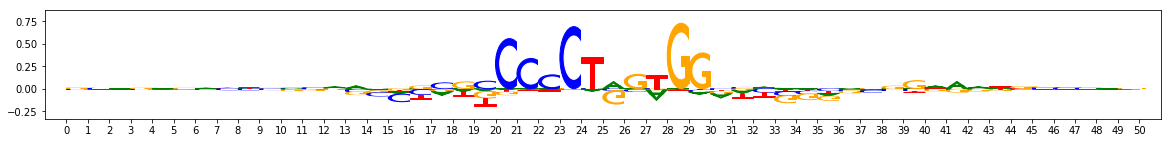

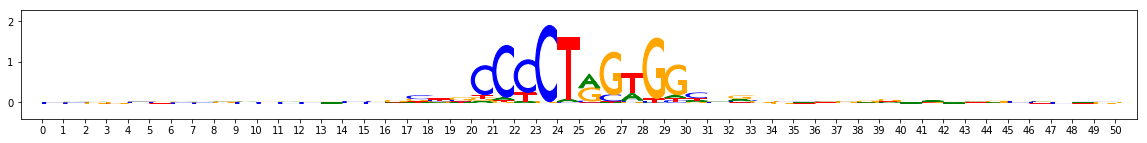

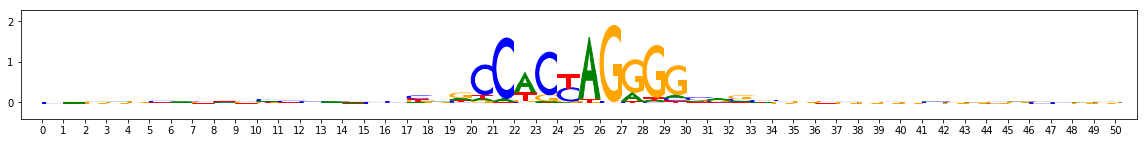

metacluster_1 pattern_2
total seqlets: 234
Task 0 hypothetical scores:


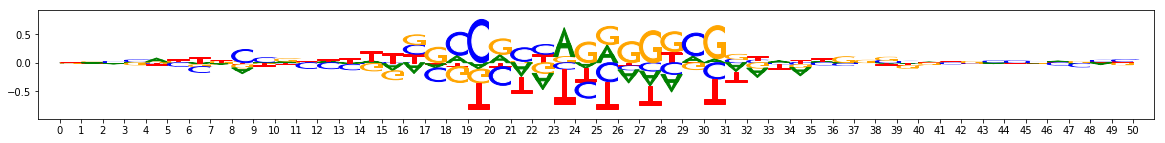

Task 0 actual importance scores:


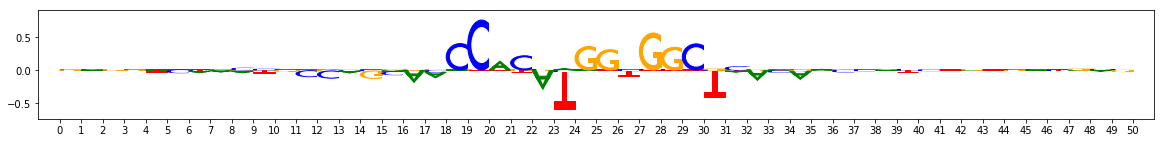

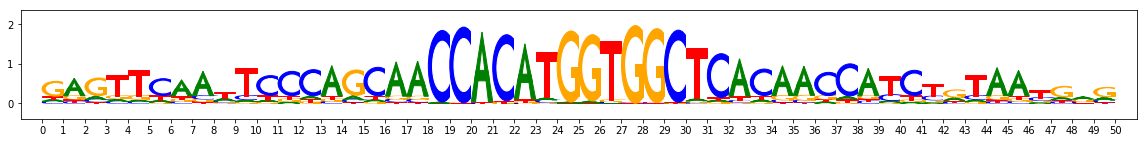

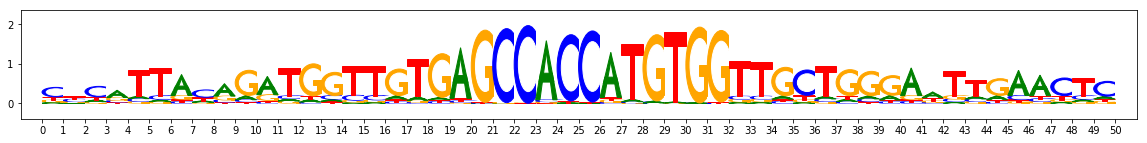

metacluster_1 pattern_3
total seqlets: 227
Task 0 hypothetical scores:


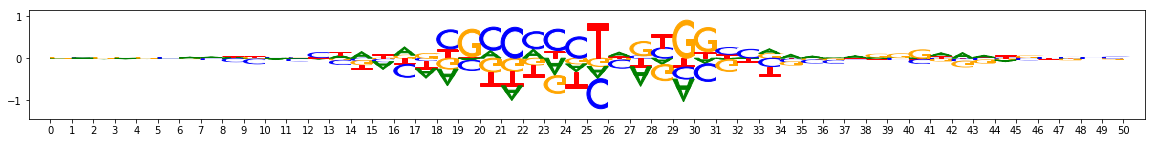

Task 0 actual importance scores:


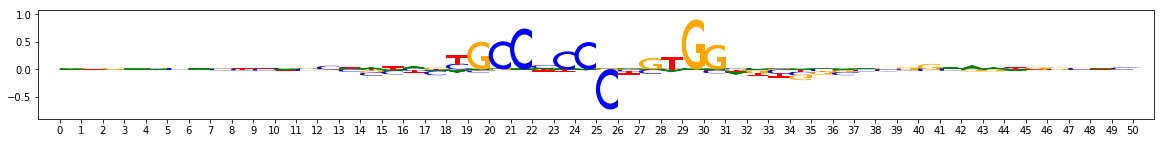

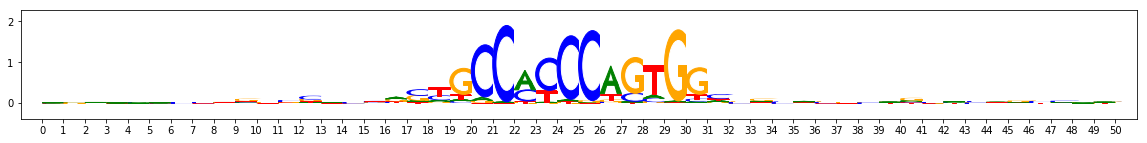

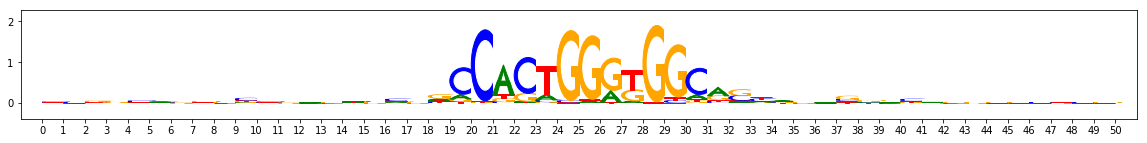

metacluster_1 pattern_4
total seqlets: 118
Task 0 hypothetical scores:


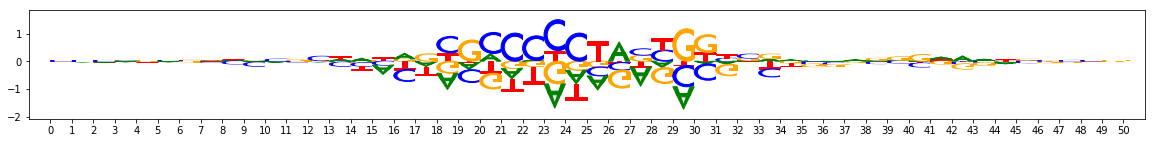

Task 0 actual importance scores:


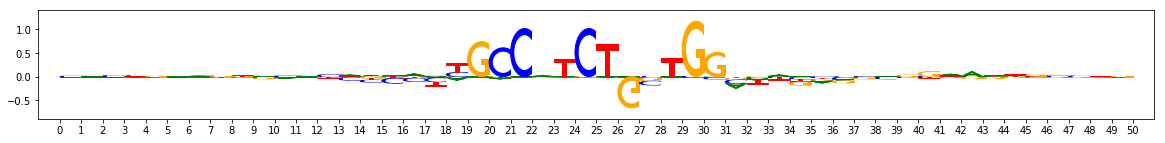

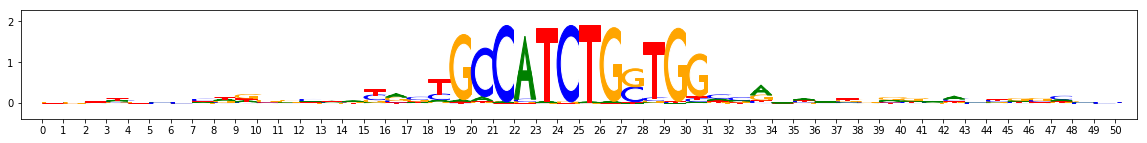

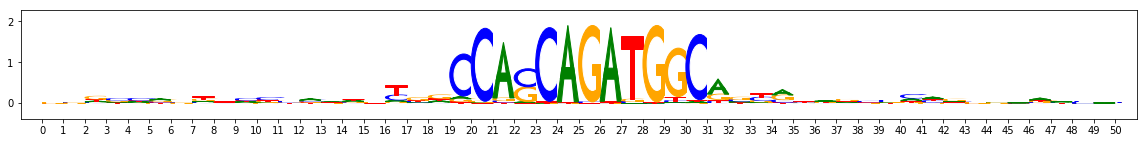

metacluster_1 pattern_5
total seqlets: 67
Task 0 hypothetical scores:


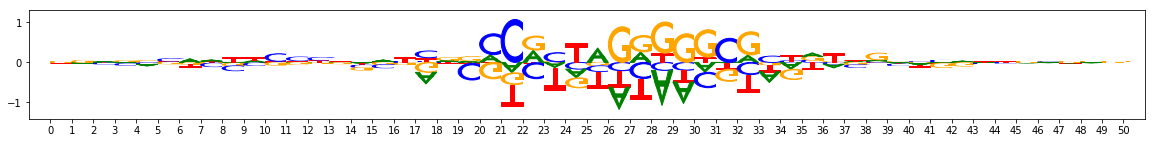

Task 0 actual importance scores:


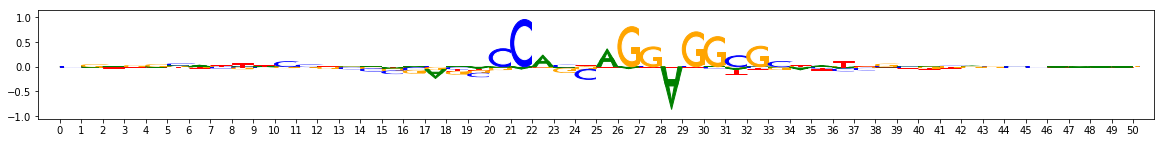

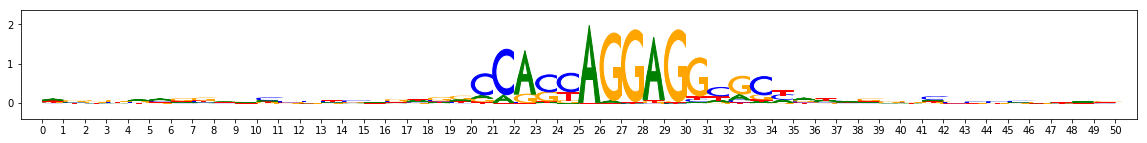

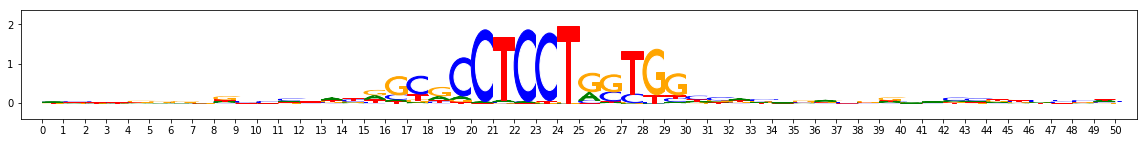

metacluster_1 pattern_6
total seqlets: 67
Task 0 hypothetical scores:


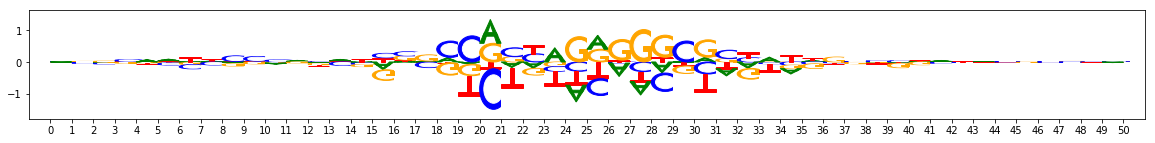

Task 0 actual importance scores:


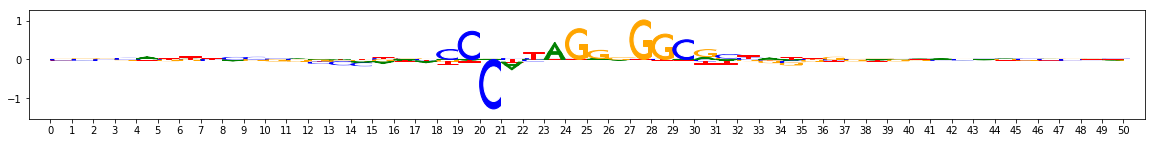

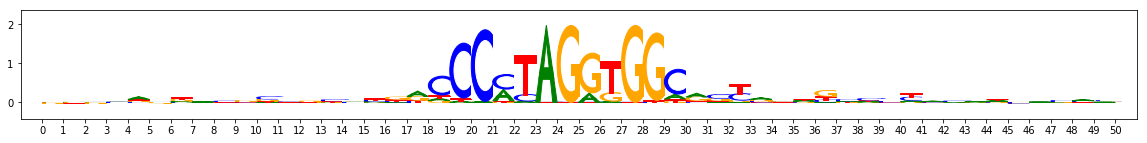

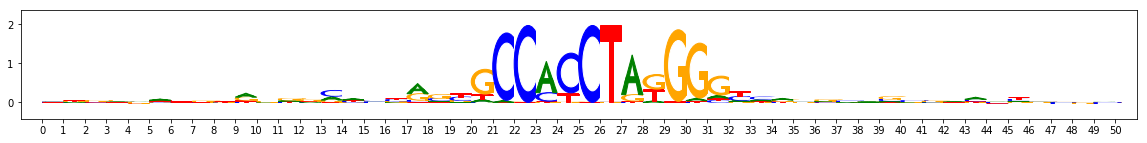

metacluster_1 pattern_7
total seqlets: 59
Task 0 hypothetical scores:


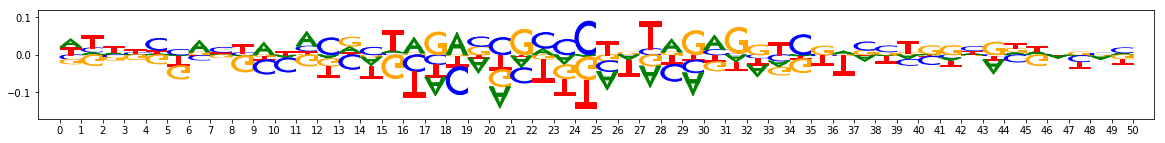

Task 0 actual importance scores:


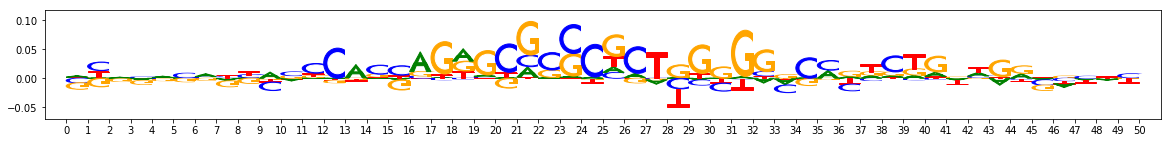

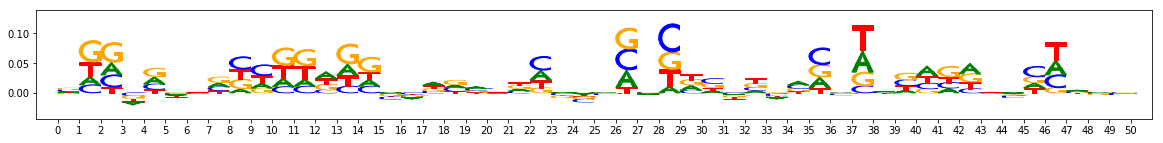

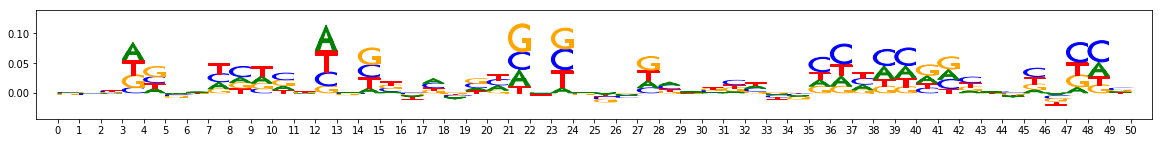

metacluster_1 pattern_8
total seqlets: 45
Task 0 hypothetical scores:


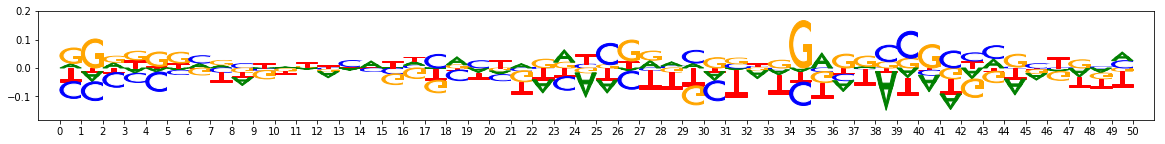

Task 0 actual importance scores:


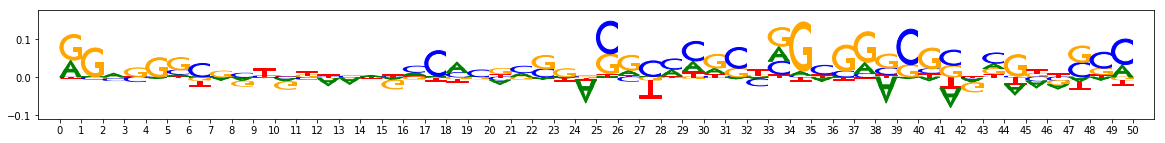

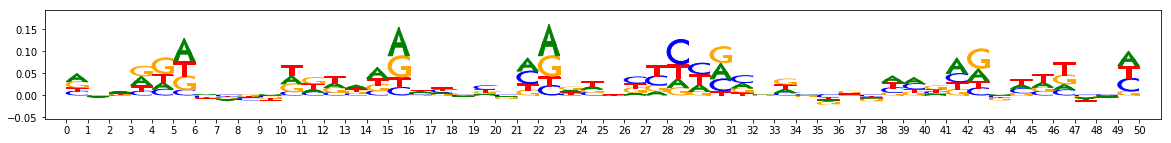

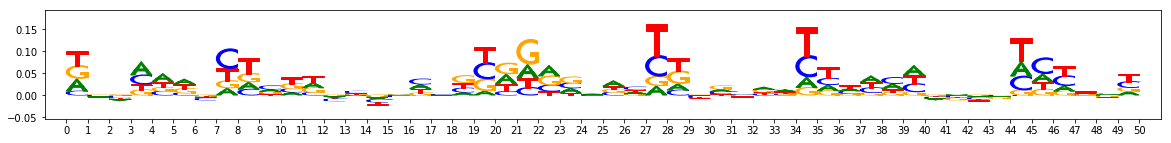

metacluster_1 pattern_9
total seqlets: 41
Task 0 hypothetical scores:


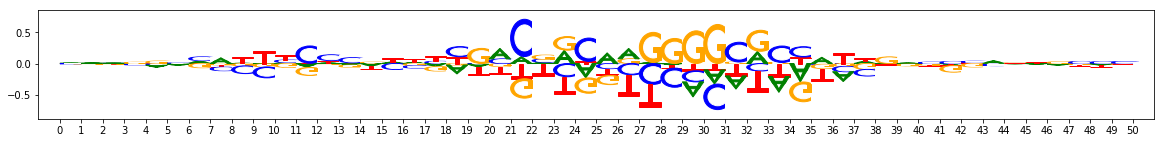

Task 0 actual importance scores:


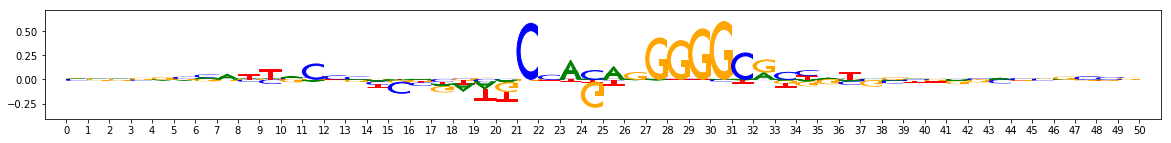

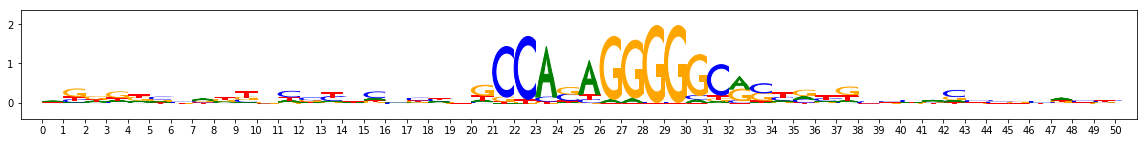

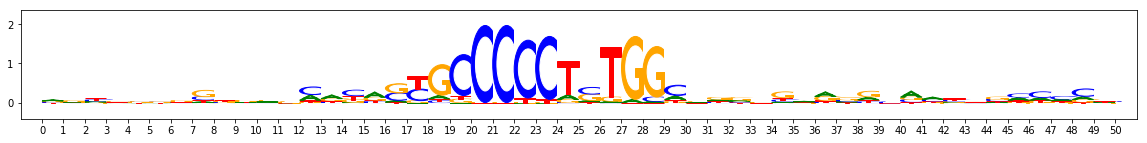

metacluster_1 pattern_10
total seqlets: 33
Task 0 hypothetical scores:


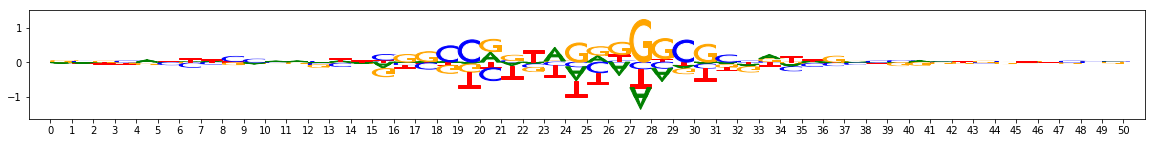

Task 0 actual importance scores:


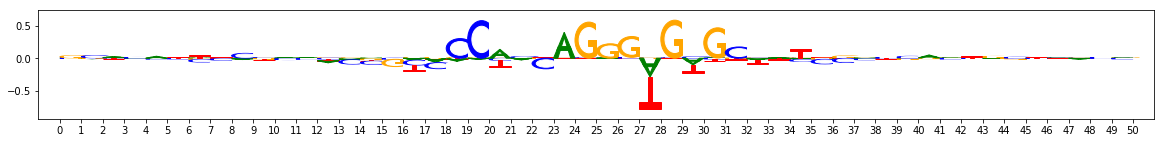

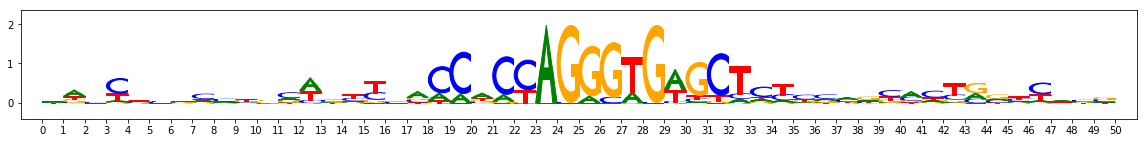

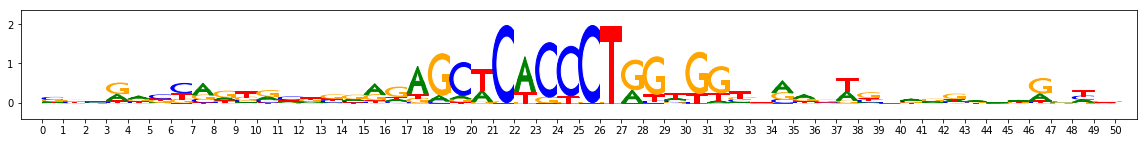

metacluster_1 pattern_11
total seqlets: 26
Task 0 hypothetical scores:


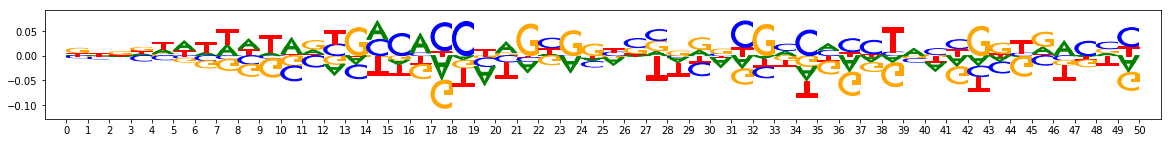

Task 0 actual importance scores:


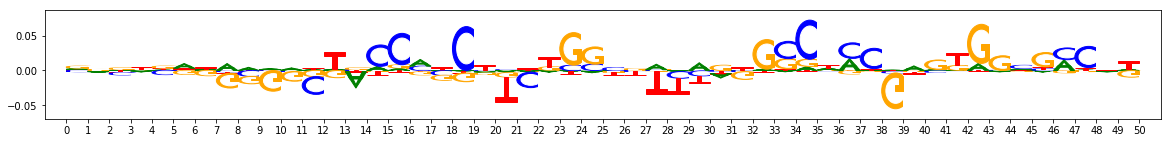

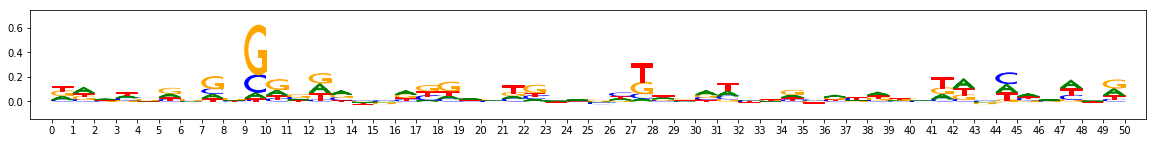

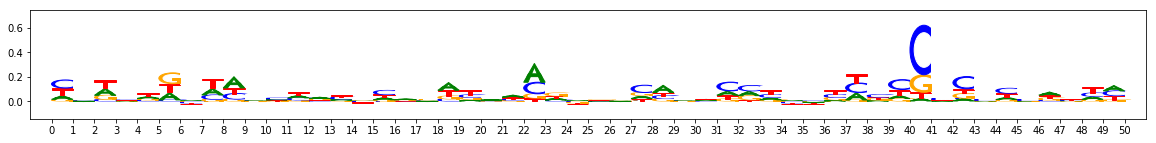

metacluster_1 pattern_12
total seqlets: 22
Task 0 hypothetical scores:


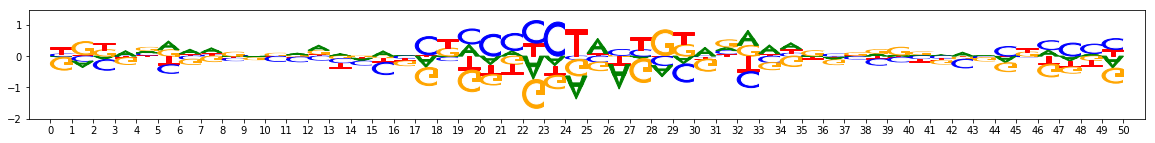

Task 0 actual importance scores:


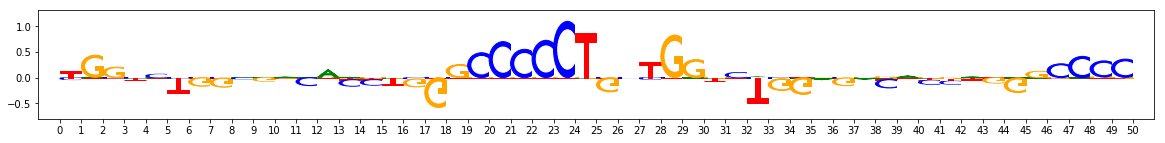

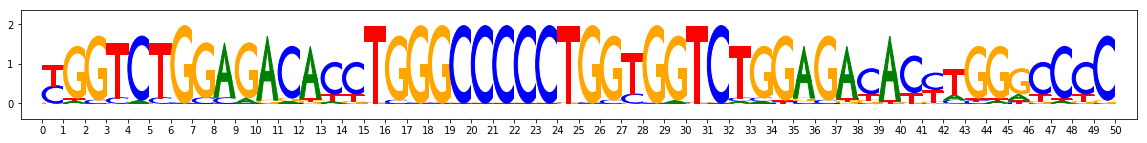

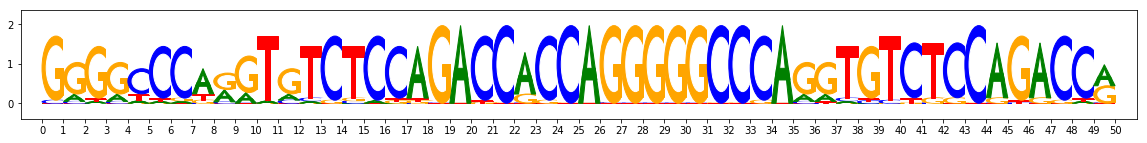

In [2]:
import h5py
import modisco.util
reload(modisco.util)

from collections import Counter
from modisco.visualization import viz_sequence
reload(viz_sequence)
from matplotlib import pyplot as plt

import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.aggregator
reload(modisco.aggregator)

hdf5_results = h5py.File("CTCFZF6_actB_vsWT_1000bp_conv3LowFiltTop_TFModiscoResults.h5","r")

print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0)
plt.show()

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        background = np.array([0.29, 0.21, 0.21, 0.29])
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                        background=background)) 
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                        background=background)) 
        
hdf5_results.close()

metacluster_0
activity pattern: [-1]
metacluster_1
activity pattern: [1]
metacluster_1 pattern_0
total seqlets: 5618
Task 0 hypothetical scores:


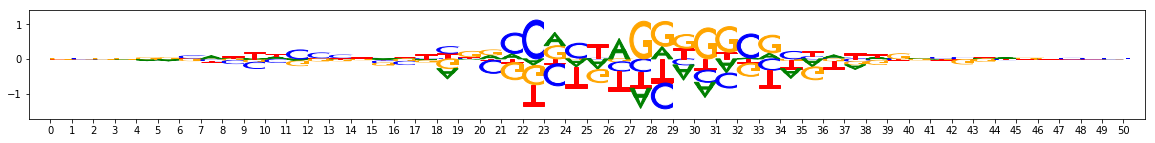

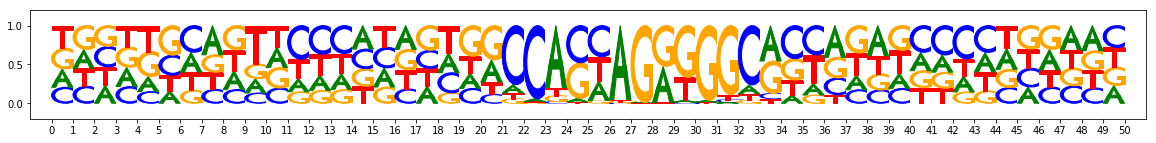

[[  8.21913758e-04   4.14178500e-04   4.71588341e-03  -2.47743437e-03]
 [ -1.16947662e-03   3.62100047e-03   3.59197011e-03  -2.28905745e-03]
 [ -1.40420143e-03   1.61895874e-03   5.11796337e-03  -1.33424338e-03]
 [ -3.12385359e-03  -1.81456684e-03   1.11599122e-02  -4.03880860e-05]
 [ -2.58749073e-02  -2.56021218e-02   2.82629047e-02   2.60832395e-03]
 [ -3.27091836e-02  -1.47242823e-02   2.12705695e-02  -1.12980920e-02]
 [  1.22343983e-02   6.11459973e-02  -5.11990843e-02   1.40373169e-02]
 [  9.53160466e-02  -3.04702450e-02  -2.18278264e-02  -4.66116773e-02]
 [  2.62556646e-02  -9.15416725e-02  -4.51869960e-02   4.54452721e-02]
 [ -3.29603652e-02  -1.81560490e-01  -6.32115216e-02   1.99749220e-01]
 [  7.27281400e-02  -8.68077078e-02  -1.47999092e-02   8.18639273e-02]
 [ -6.08130295e-02   2.57171521e-01  -1.33612219e-01  -1.99669986e-03]
 [  9.85961907e-04   1.40674221e-01  -6.02068487e-02   2.90535501e-02]
 [ -2.67421154e-02   7.20880427e-02  -2.74623357e-02   3.59816727e-02]
 [ -3.

In [3]:
# Get the PFM with the most seqlets

hdf5_results = h5py.File("CTCFZF6_actB_vsWT_1000bp_conv3LowFiltTop_TFModiscoResults.h5","r")

activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    if metacluster_name != "metacluster_1":
        continue
    pattern_name = all_pattern_names[0]
    print(metacluster_name, pattern_name)
    all_patterns.append((metacluster_name, pattern_name))
    pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
    print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
    background = np.array([0.29, 0.21, 0.21, 0.29])
    print("Task 0 hypothetical scores:")
    viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
    viz_sequence.plot_weights(pattern["sequence"]["fwd"])
    print(np.array(pattern["task0_hypothetical_contribs"]["fwd"]))
    print(np.array(pattern["sequence"]["fwd"]))
        
hdf5_results.close()

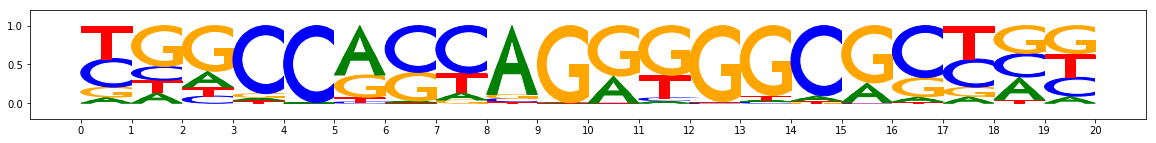

In [7]:
from modisco.visualization import viz_sequence
coreMotif = np.array([[0.306, 0.36, 0.242, 0.092], [0.046, 0.358, 0.304, 0.292], [0.43, 0.118, 0.362, 0.09], [0.02, 0.246, 0.67, 0.064], [0.004, 0.738, 0.006, 0.252], [0.03, 0.0, 0.904, 0.066], [0.058, 0.9, 0.02, 0.022], [0.01, 0.98, 0.008, 0.002], [0.29, 0.64, 0.036, 0.034], [0.002, 0.65, 0.0, 0.348], [0.004, 0.994, 0.0, 0.002], [0.024, 0.052, 0.038, 0.886], [0.242, 0.042, 0.612, 0.104], [0.01, 0.368, 0.602, 0.02], [0.06, 0.286, 0.018, 0.636], [0.002, 0.0, 0.99, 0.008], [0.036, 0.048, 0.876, 0.04], [0.116, 0.588, 0.092, 0.204], [0.15, 0.526, 0.176, 0.148], [0.424, 0.128, 0.368, 0.08]])
viz_sequence.plot_weights(coreMotif[..., ::-1, ::-1])